In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

import seaborn as sns
sns.set()

In [385]:
df = pd.read_csv('data/sample01.csv')

df.head()

,accelX,accelY,accelZ,gyroX,gyroY,gyroZ,NA
0,-0.72,6.44,5.94,-2.28,1.59,0.42,NaN
1,-0.71,6.17,5.71,-2.29,1.32,0.55,NaN
2,-0.83,6.02,5.70,-2.29,1.02,0.70,NaN
3,-0.73,5.82,5.74,-2.27,0.69,0.84,NaN
4,-0.58,5.74,5.58,-2.25,0.37,0.95,NaN


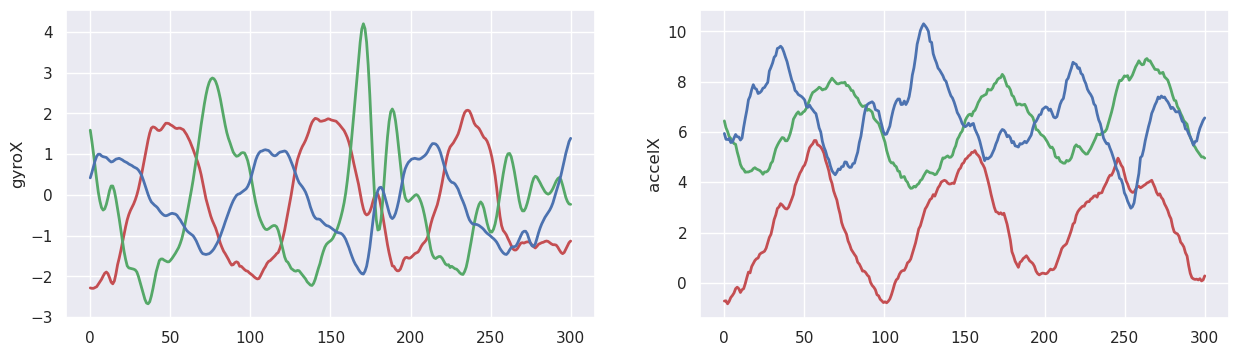

In [386]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

N = len(df[df.columns[0]])

x = np.linspace(0,N,N)

axisName = ['x','y','z']
colors = ['r','g','b']
accel = [df['accelX'], df['accelY'], df['accelZ']]
gyro = [df['gyroX'], df['gyroY'], df['gyroZ']]

for i in range(3):
    sns.lineplot(x=x, y=accel[i], ax=axes[1], color=colors[i], lw=2)
    sns.lineplot(x=x, y=gyro[i], ax=axes[0], color=colors[i], lw=2)

Text(0.5, 0.01, 'Freq [Hertz]')

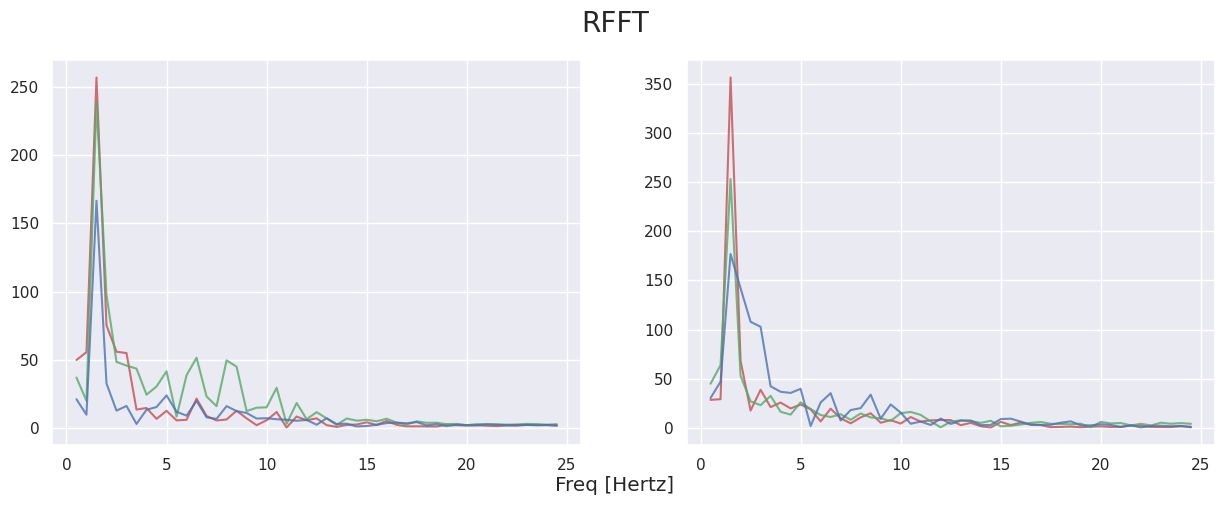

In [387]:
from scipy import signal
from scipy.fft import rfft, rfftfreq

freq = 150      # Hertz

start_freq = 1
cut_freq = 50

yfg = [[],[],[]]
yfa = [[],[],[]]
xf = rfftfreq(N, 1 / freq)[start_freq:cut_freq]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

for i in range(3):
    gyro[i] = signal.detrend(gyro[i])
    accel[i] = signal.detrend(accel[i])
    yfg[i] = np.abs(rfft(gyro[i]))[start_freq:cut_freq]
    yfa[i] = np.abs(rfft(accel[i]))[start_freq:cut_freq]

    sns.lineplot(x=xf, y=yfg[i], color=colors[i], alpha=0.8, ax=axes[0])
    sns.lineplot(x=xf, y=yfa[i], color=colors[i], alpha=0.8, ax=axes[1])

fig.suptitle("RFFT", fontsize=20)
fig.supxlabel("Freq [Hertz]")

In [388]:
fft_pairsA = [[],[],[]]
fft_pairsG = [[],[],[]]

for i in range(3):
    fft_pairsA[i] = np.stack((xf,yfa[i],['accel']*len(xf),[axisName[i]]*len(xf)), axis=1)
    fft_pairsG[i] = np.stack((xf,yfg[i],['gyro']*len(xf),[axisName[i]]*len(xf)), axis=1)

allFFT = np.concatenate([np.concatenate(fft_pairsA),np.concatenate(fft_pairsG)])

superDF = pd.DataFrame(allFFT, columns=['freq', 'amplitude', 'type', 'axis']).convert_dtypes(convert_string=True)
superDF['freq'] = superDF['freq'].astype(float)
superDF['amplitude'] = superDF['amplitude'].astype(float)

superDF.head()

,freq,amplitude,type,axis
0,0.5,28.440904,accel,x
1,1.0,29.135788,accel,x
2,1.5,356.571746,accel,x
3,2.0,68.070283,accel,x
4,2.5,17.555926,accel,x


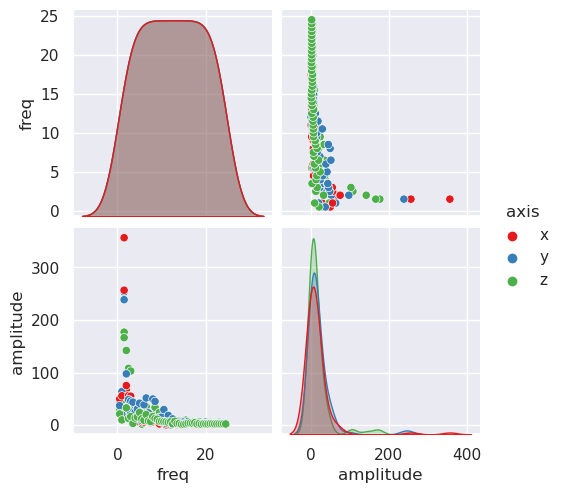

In [389]:
sns.pairplot(superDF, palette="Set1", hue='axis')